In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

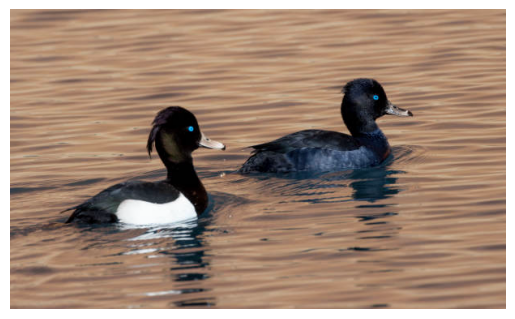

In [71]:
image=cv2.imread('DUCK.jpg')
plt.imshow(image);
plt.axis('off') ;

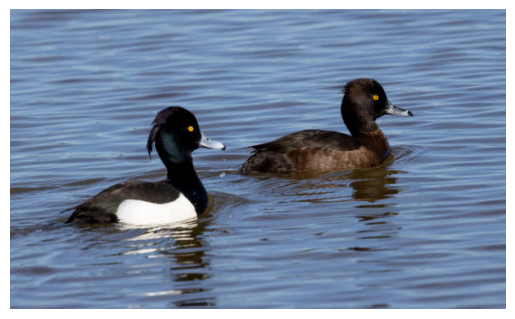

In [72]:
# Changing the image from BGR to RGB
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image);
plt.axis('off') ;

In [73]:
# Reshaping the image to 2d 
pixel_vals = image.reshape((image.shape[0]*image.shape[1],3))
pixel_vals = np.float32(pixel_vals)

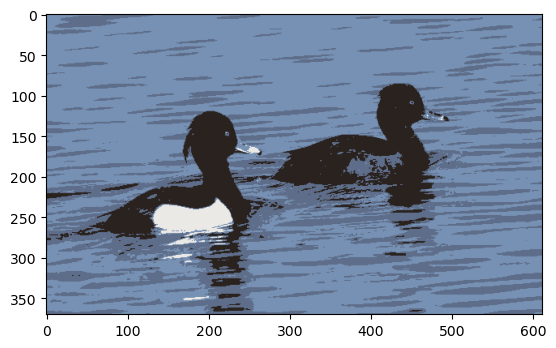

In [74]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 4
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image);

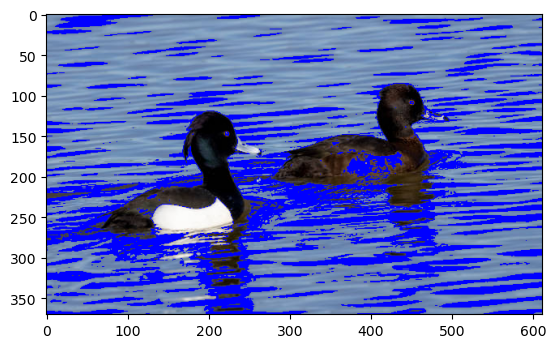

In [75]:
BLUE = (0,0,255)
RED = (255,0,0)
cluster = 3
masked_image = np.copy(image)
masked_image[labels_reshape == cluster] = [BLUE]
cv2.imwrite('images/masked.jpg',masked_image)

plt.imshow(masked_image);

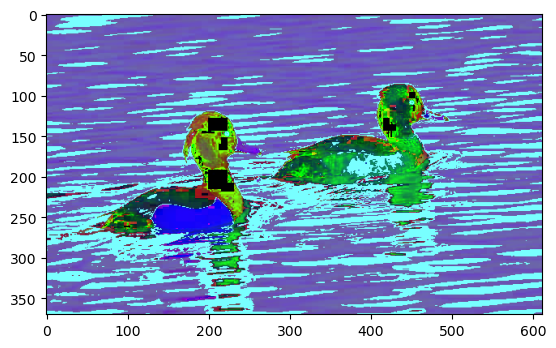

In [76]:
hsv_img = cv2.cvtColor(masked_image, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

In [77]:
blue = np.uint8([[[255,0,0]]])
hsv_blue = cv2.cvtColor(blue,cv2.COLOR_BGR2HSV)
print(hsv_blue)

[[[120 255 255]]]


[[[120 255 255]]]


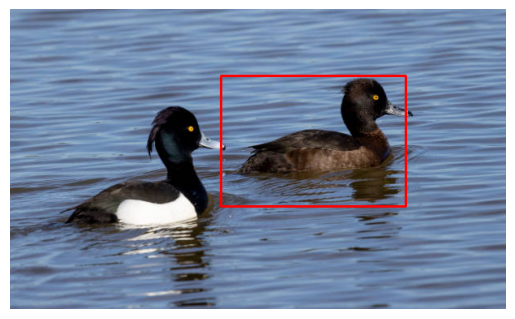

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

image=cv2.imread('DUCK.jpg')
plt.imshow(image);
plt.axis('off') ;

# Changing the image from BGR to RGB
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image);
plt.axis('off') ;

# Reshaping the image to 2d 
pixel_vals = image.reshape((image.shape[0]*image.shape[1],3))
pixel_vals = np.float32(pixel_vals)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 4
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image);

BLUE = (0,0,255)
RED = (255,0,0)
cluster = 3
masked_image = np.copy(image)
masked_image[labels_reshape == cluster] = [BLUE]
cv2.imwrite('images/masked.jpg',masked_image)

plt.imshow(masked_image);

hsv_img = cv2.cvtColor(masked_image, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

blue = np.uint8([[[255,0,0]]])
hsv_blue = cv2.cvtColor(blue,cv2.COLOR_BGR2HSV)
print(hsv_blue)

lower_blue = (120,255,250)
upper_blue = (120,255,255)
COLOR_MIN = np.array([lower_blue],np.uint8)
COLOR_MAX = np.array([upper_blue],np.uint8)
frame_threshed = cv2.inRange(hsv_img, COLOR_MIN, COLOR_MAX)
imgray = frame_threshed
ret,thresh = cv2.threshold(frame_threshed,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# Find the index of the largest contour
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
cnt=contours[max_index]

x,y,w,h = cv2.boundingRect(cnt)

pad_w = 3

pad_h = 4
pad_x = 3
pad_y = 4

cv2.rectangle(image,(x-pad_x,y-pad_y),(x+w+pad_w,y+h+pad_h),(255,0,0),2)

plt.imshow(image);